In [ ]:
#Import data
import pandas as pd
data = pd.read_csv('/content/india macro data.csv')
#previews the first 5 rows to check if the data loaded correctly
data.head()

,Quarter,Repo_Rate,CRR,SLR,GDP_Growth_YoY,CPI_Inflation_YoY,Nifty_Growth_QoQ,FDI_as_pct_of_GDP
0,2000 Q1,8.0,8.5,25.0,3.9,4.8,-11.1,0.5
1,2000 Q2,8.0,8.0,25.0,5.4,3.7,0.5,0.7
2,2000 Q3,8.0,8.0,25.0,3.9,3.6,-13.8,0.7
3,2000 Q4,8.0,8.5,25.0,3.5,4.0,9.0,0.4
4,2001 Q1,7.0,8.0,25.0,2.1,3.4,-6.2,0.8


In [ ]:

# Check for missing values
print(data.isnull().sum())
# Drop rows with missing values
data = data.dropna()
# Verify missing values are handled
print(data.isnull().sum())
# Convert the index to datetime objects for time series analysis
# Assuming the 'Quarter' column is in a format like 'YYYY Q1', 'YYYY Q2', etc.
data.index = pd.to_datetime(data.index.str.replace(' ', '-'))
# Display the first few rows with the new index
print(data.head())

Repo_Rate            0
CRR                  0
SLR                  0
GDP_Growth_YoY       0
CPI_Inflation_YoY    0
Nifty_Growth_QoQ     0
FDI_as_pct_of_GDP    0
dtype: int64
Repo_Rate            0
CRR                  0
SLR                  0
GDP_Growth_YoY       0
CPI_Inflation_YoY    0
Nifty_Growth_QoQ     0
FDI_as_pct_of_GDP    0
dtype: int64
            Repo_Rate  CRR   SLR  GDP_Growth_YoY  CPI_Inflation_YoY  \
Quarter                                                               
2000-01-01        8.0  8.5  25.0             3.9                4.8   
2000-04-01        8.0  8.0  25.0             5.4                3.7   
2000-07-01        8.0  8.0  25.0             3.9                3.6   
2000-10-01        8.0  8.5  25.0             3.5                4.0   
2001-01-01        7.0  8.0  25.0             2.1                3.4   

            Nifty_Growth_QoQ  FDI_as_pct_of_GDP  
Quarter                                          
2000-01-01             -11.1                0.5  
2000

/tmp/ipython-input-18-647225578.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data.index.str.replace(' ', '-'))


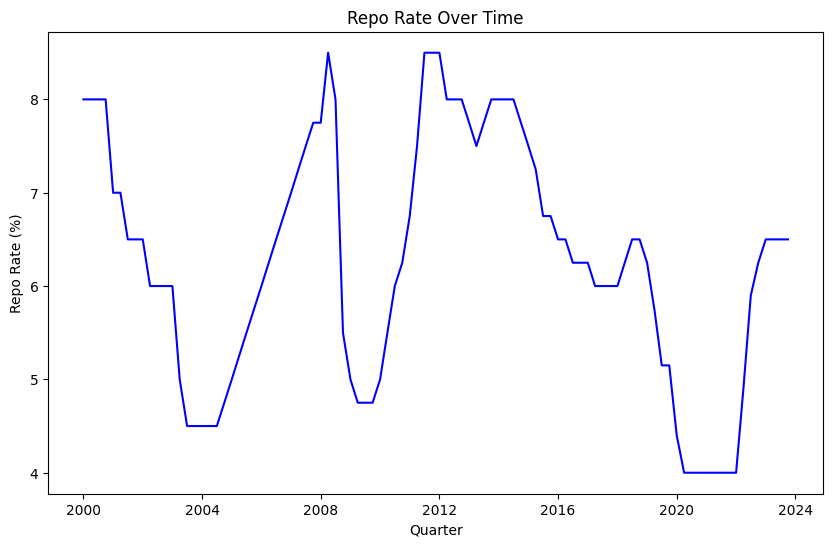

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the 'Policy_Rate' over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Repo_Rate'], color="blue")
plt.title("Repo Rate Over Time")
plt.ylabel("Repo Rate (%)")
plt.xlabel("Quarter")
plt.show()


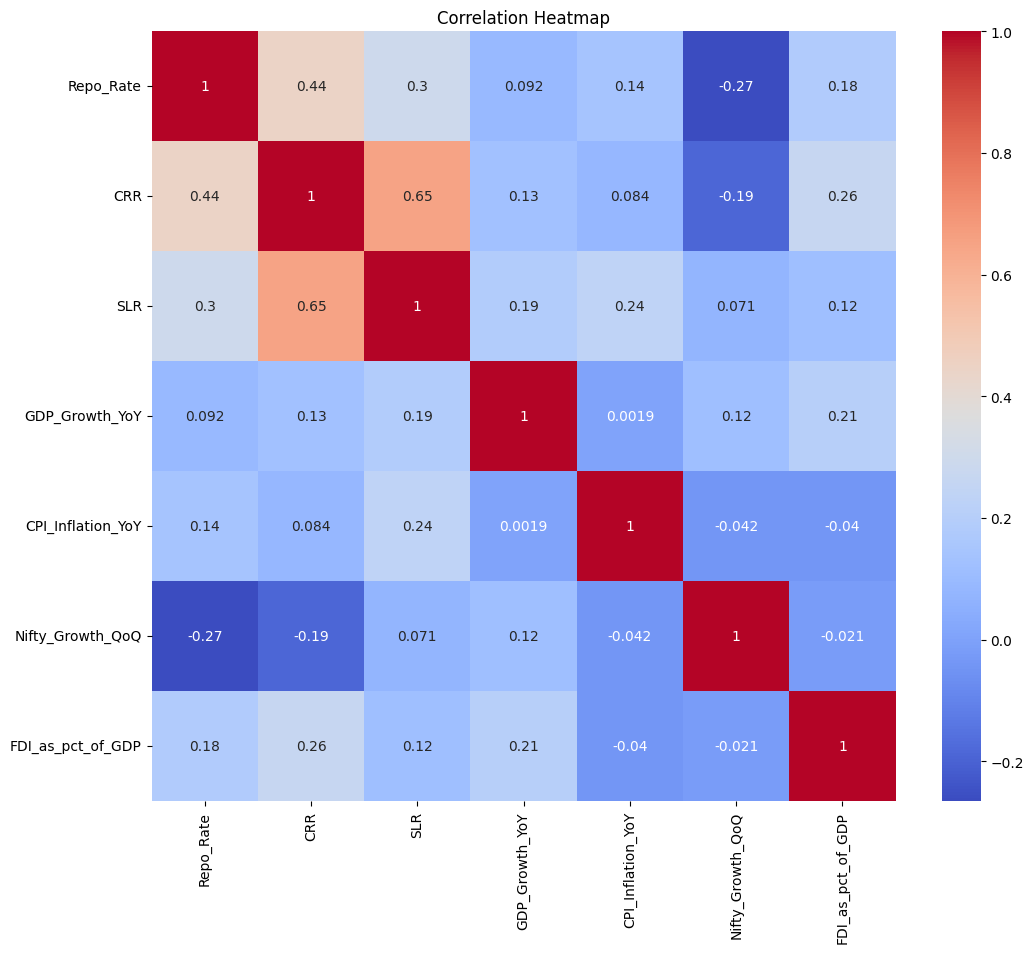

In [ ]:
# Plot the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

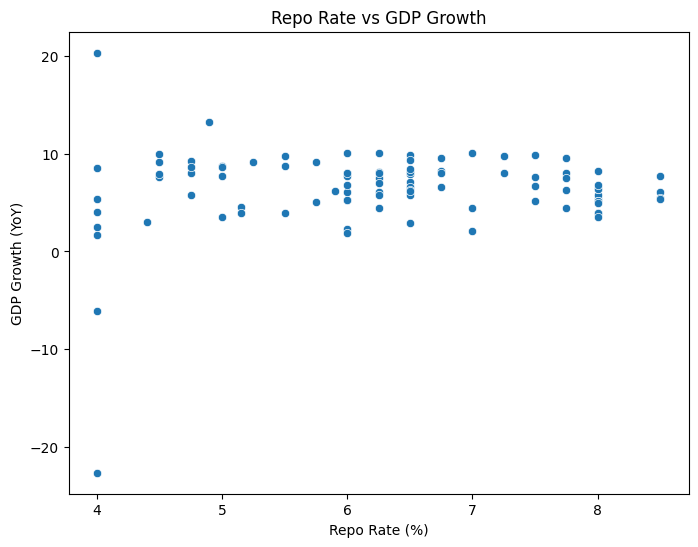

In [ ]:
# Repo Rate vs GDP Growth
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Repo_Rate'], y=data['GDP_Growth_YoY'])
plt.title("Repo Rate vs GDP Growth")
plt.xlabel("Repo Rate (%)")
plt.ylabel("GDP Growth (YoY)")
plt.show()

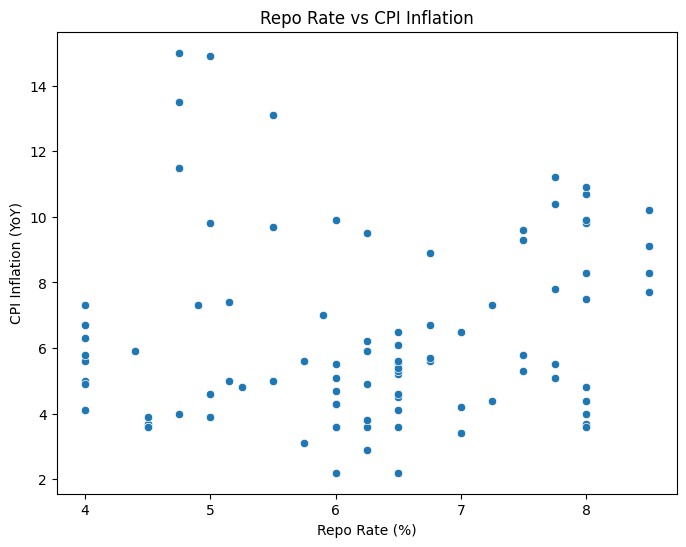

In [ ]:
# Repo Rate vs Inflation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Repo_Rate'], y=data['CPI_Inflation_YoY'])
plt.title("Repo Rate vs CPI Inflation")
plt.xlabel("Repo Rate (%)")
plt.ylabel("CPI Inflation (YoY)")
plt.show()

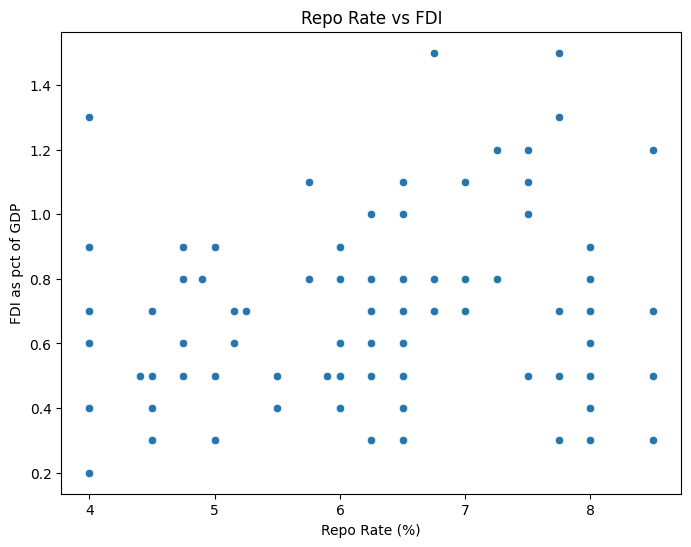

In [ ]:
# Repo Rate vs FDI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Repo_Rate'], y=data['FDI_as_pct_of_GDP'])
plt.title("Repo Rate vs FDI")
plt.xlabel("Repo Rate (%)")
plt.ylabel("FDI as pct of GDP")
plt.show()

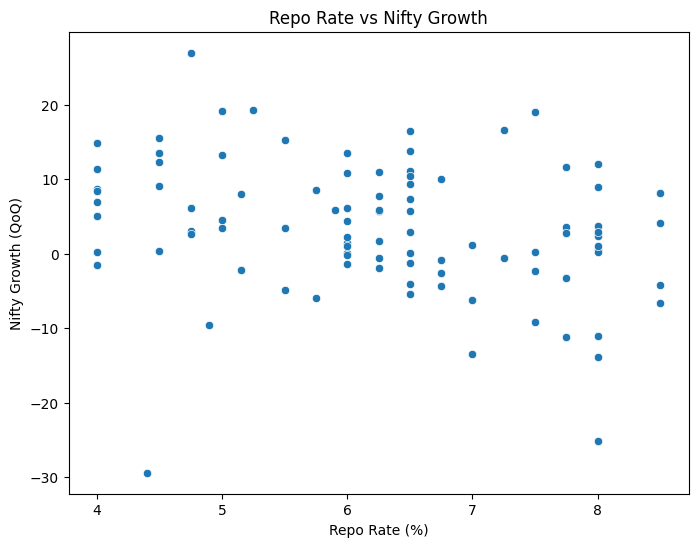

In [ ]:
# Repo Rate vs Nifty Growth
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Repo_Rate'], y=data['Nifty_Growth_QoQ'])
plt.title("Repo Rate vs Nifty Growth")
plt.xlabel("Repo Rate (%)")
plt.ylabel("Nifty Growth (QoQ)")
plt.show()

In [ ]:
# Install the statsmodels library
# !pip install statsmodels

# Import the adfuller function from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

# Check stationarity for each column
for col in data.columns:
    result = adfuller(data[col])
    print(f"{col} p-value: {result[1]}")

Repo_Rate p-value: 0.05223612762068302
CRR p-value: 0.06392313579798918
SLR p-value: 0.9876965821477975
GDP_Growth_YoY p-value: 5.734824802423383e-07
CPI_Inflation_YoY p-value: 0.4789148170306564
Nifty_Growth_QoQ p-value: 3.739301716335307e-11
FDI_as_pct_of_GDP p-value: 5.132978914965302e-07


In [ ]:
# Difference the non-stationary series
data_diff = data.copy()
data_diff['Repo_Rate'] = data_diff['Repo_Rate'].diff().dropna()
data_diff['CRR'] = data_diff['CRR'].diff().dropna()
data_diff['SLR'] = data_diff['SLR'].diff().dropna()
data_diff['CPI_Inflation_YoY'] = data_diff['CPI_Inflation_YoY'].diff().dropna()
# Drop the first row with NaN values created by differencing
data_diff = data_diff.dropna()

# Verify stationarity after differencing (optional)
for col in ['Repo_Rate', 'CRR', 'SLR', 'CPI_Inflation_YoY']: result = adfuller(data_diff[col])
print(f"Differenced {col} p-value: {result[1]}")

Differenced CPI_Inflation_YoY p-value: 1.7259474361308685e-09


In [ ]:
 # Display the first few rows of the differenced dataframe
 print(data_diff.head())

            Repo_Rate  CRR  SLR  GDP_Growth_YoY  CPI_Inflation_YoY  \
Quarter                                                              
2000-04-01        0.0 -0.5  0.0             5.4               -1.1   
2000-07-01        0.0  0.0  0.0             3.9               -0.1   
2000-10-01        0.0  0.5  0.0             3.5                0.4   
2001-01-01       -1.0 -0.5  0.0             2.1               -0.6   
2001-04-01        0.0 -0.5  0.0             4.4                0.8   

            Nifty_Growth_QoQ  FDI_as_pct_of_GDP  
Quarter                                          
2000-04-01               0.5                0.7  
2000-07-01             -13.8                0.7  
2000-10-01               9.0                0.4  
2001-01-01              -6.2                0.8  
2001-04-01             -13.4                0.7  


In [ ]:
#Import VAR model
from statsmodels.tsa.api import VAR
# Select the differenced and stationary series for the VAR model
# Adjust the list of columns based on your specific analysis needs
model_data = data_diff[['Repo_Rate', 'CRR', 'SLR', 'GDP_Growth_YoY', 'CPI_Inflation_YoY', 'Nifty_Growth_QoQ', 'FDI_as_pct_of_GDP']]
# Create the VAR model
model = VAR(model_data)
# Fit the VAR model
results = model.fit(maxlags=4)
# You can adjust the number of lags as needed

# Print the model summary
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Jul, 2025
Time:                     07:22:57
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    3.47786
Nobs:                     91.0000    HQIC:                  0.136426
Log likelihood:          -604.254    FPE:                   0.140531
AIC:                     -2.12329    Det(Omega_mle):       0.0202672
--------------------------------------------------------------------
Results for equation Repo_Rate
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.129063         0.177227            0.728           0.466
L1.Repo_Rate                 0.204102         0.132249            1.543           0.123
L1.CRR                      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


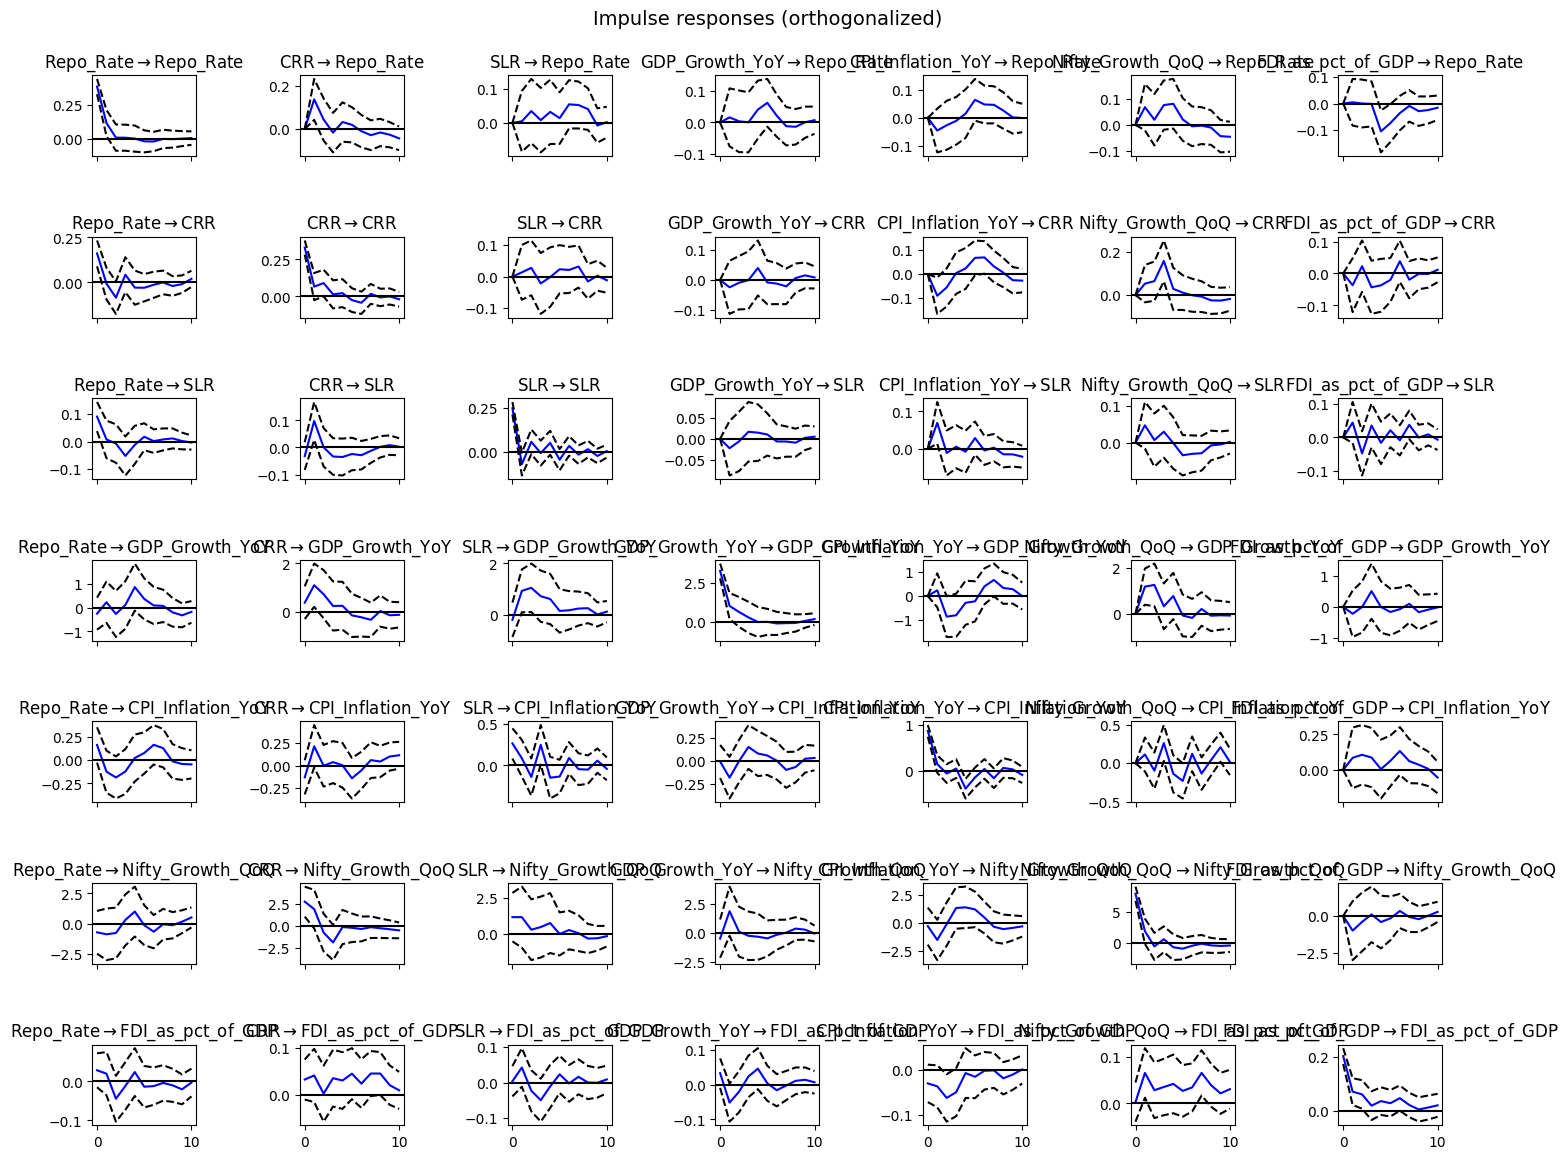

In [ ]:
 # Calculate the Impulse Response Functions (IRFs)
 irf = results.irf(10)
 # We can adjust the number of periods for the IRF
 # Plot the IRFs

 # orth=True orthogonalizes the shocks



 irf.plot(orth=True, figsize=(15, 12))
 # Adjust the figure size as needed
 plt.subplots_adjust(hspace=1.0, wspace=1.0)
 # Adjust hspace and wspace for spacing
 plt.show()

In [ ]:
# Forecast future values
# 'steps' specifies the number of periods to forecast
forecast = results.forecast(model_data.values[-results.k_ar:], steps=8)
# Create a dataframe for the forecast results
forecast_df = pd.DataFrame(forecast, columns=model_data.columns)
# Display the forecast results
print(forecast_df.head())

   Repo_Rate       CRR       SLR  GDP_Growth_YoY  CPI_Inflation_YoY  \
0   0.234152 -0.033361  0.081431        9.785011           1.279319   
1  -0.010245 -0.192574 -0.012997        8.980442          -0.034596   
2   0.113463  0.008638 -0.086547        5.927581          -0.416554   
3   0.325544  0.138763 -0.059443        6.499992          -0.031664   
4   0.293222  0.056290 -0.085337        7.505760          -0.867185   

   Nifty_Growth_QoQ  FDI_as_pct_of_GDP  
0          7.700136           0.492730  
1          2.467271           0.495209  
2          4.983849           0.493257  
3          8.038682           0.570101  
4          6.261561           0.650382  
